***Logistic Regression on Diabetes Dataset***

For this project, I will be building a Machine Learning model to diagostically and accurately predict if a patient has diabetes or not based on the variables in the dataset. I will be using a Logistic Regression classifier model. The dataset is from Kaggle, via the National Institute of Diabetes and Digestive and Kidney Diseases. The patients in the dataset comprises of females who are at least 21 years old and are indegenes of the Pima tribe in India.

In [1]:
# Importing all the necessary libraries
import numpy as np 
import pandas as pd 
import csv as csv 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
# Loading the diabetes datasets

df = pd.read_csv('diabetes.csv')

# Loading up the top 5 rows of the dataframe
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Datasets information... 

print('The Diabetes dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The Diabetes dataset has 768 rows and 9 columns


In [4]:
# Dataset description...

df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Checking for any missing values...

print (df.shape[0] - df.count())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


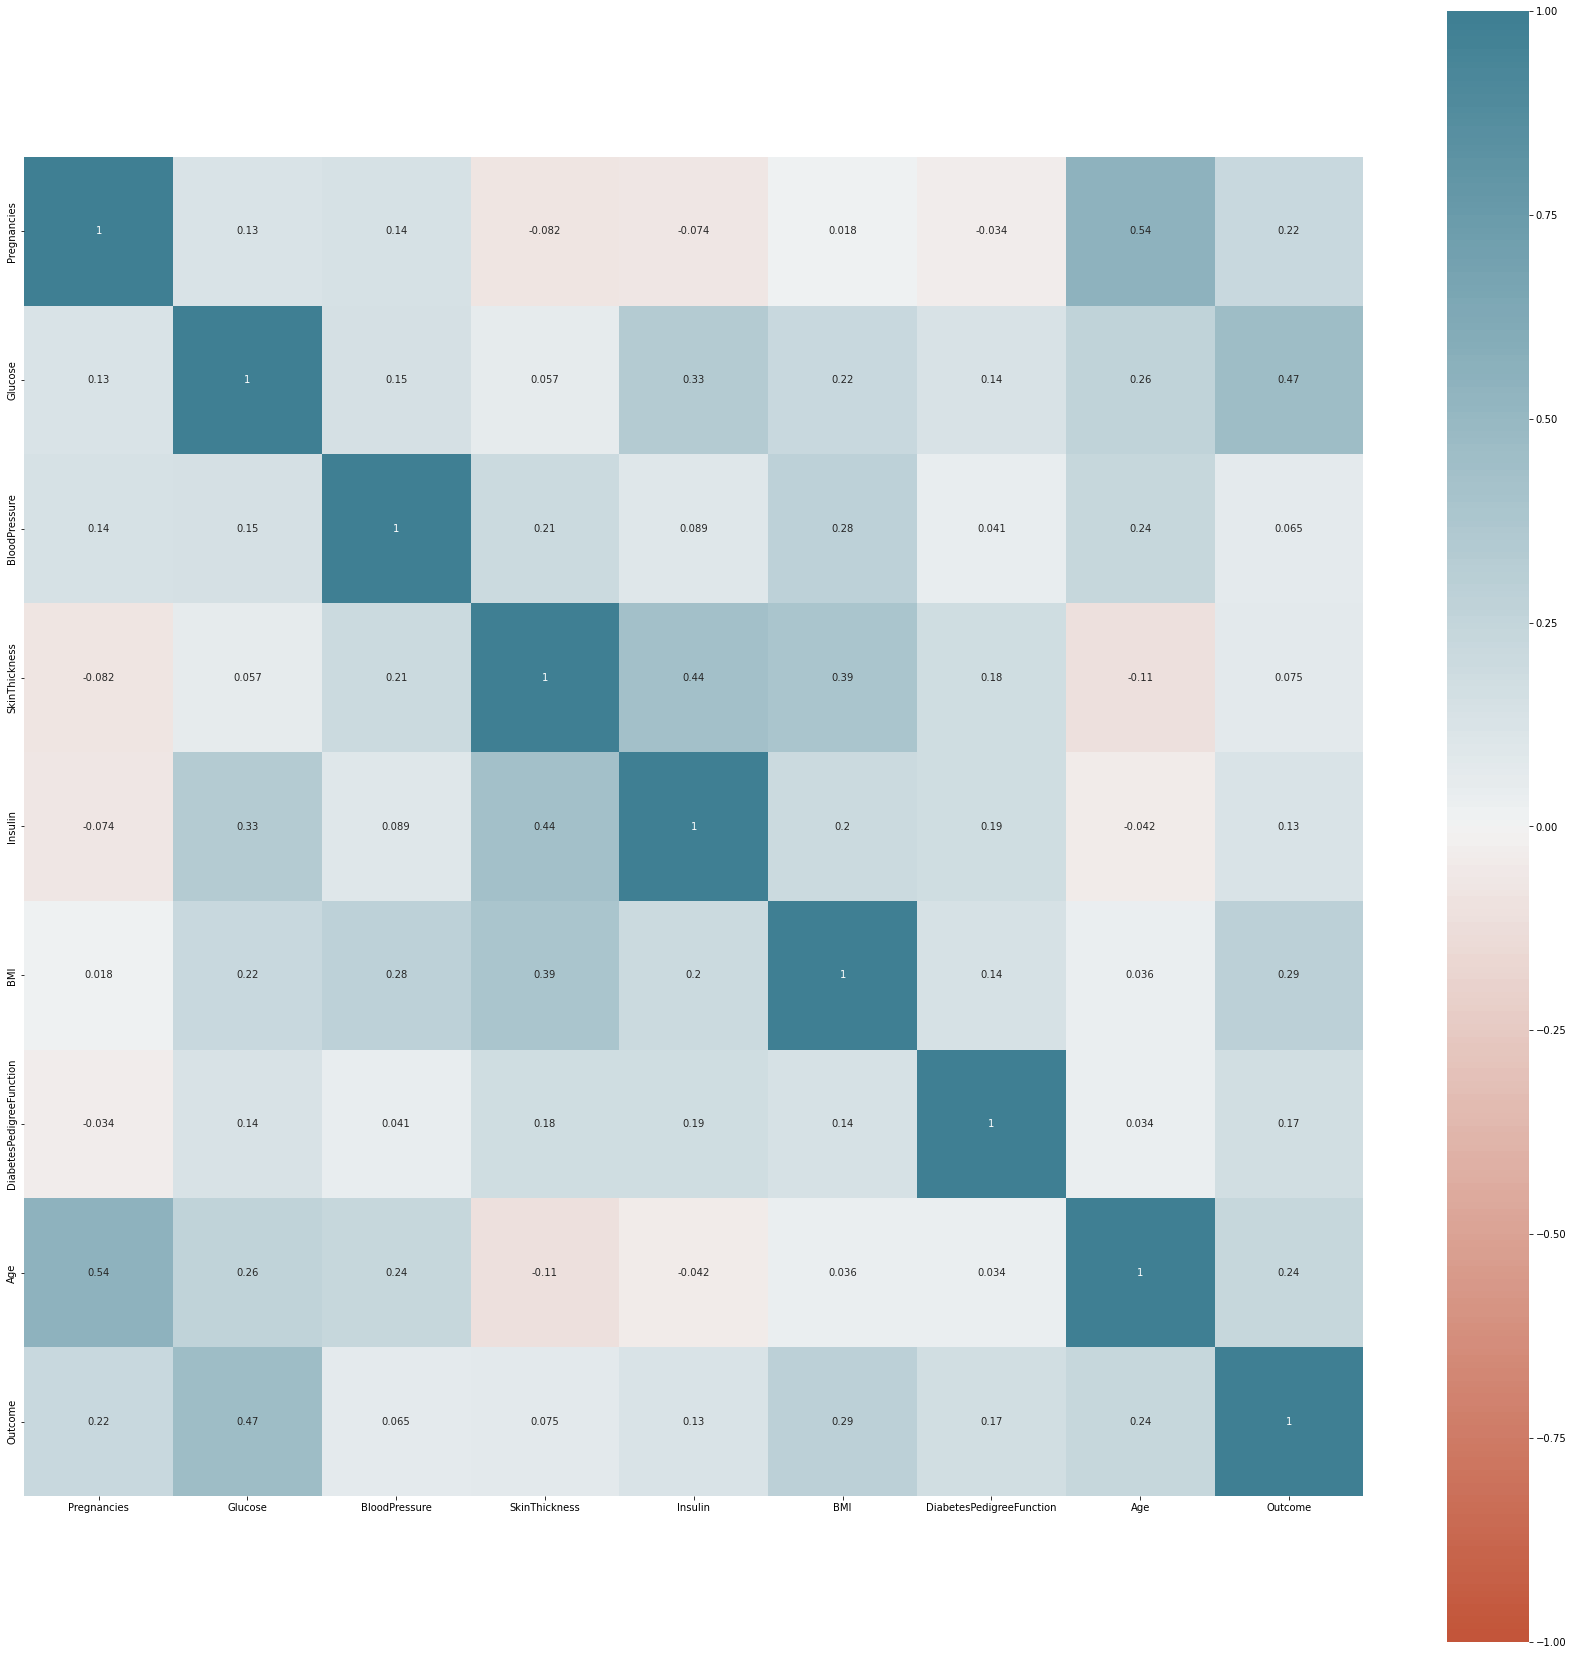

In [7]:
# Using a heatmap to show the variables that have the highest correlation between each other in the dataset

corr = df.corr()
#print(corr.head())

plt.figure(figsize = (30,30))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

As we can see from the heatmap, there is a strong correlation between Age and Pregancies of the patients. Does this mean that the older the patient and the higher the amount of pregnancies experienced increases their chances of having diabetes??

***Building The Prediction Model***

The first step in building any model is to divide the columns into dependent and independent variables. The dependent variable would be the target variable which would be the 'Outcome' column and the independent variables would be the feature variables which would be the rest of the the columns in the dataset.

In [8]:
# Diving the datasets into dependent and independent variables

# Columns for feature variables 
fc = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Features
X = df[fc]

# Target variable
y = df.Outcome

**Splitting the dataset into two**

Following the process of dividing the columns into dependent and independent variables. The next step is to divide
the dataset into training and test sets. This will help us to understand the performance of the model. The train_test_split function will be used to divide the dataset into two, in which 75% of the data will train the model and 25% for testing.

In [9]:
# Spliting the dataset into train (X) and test (y) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Next, a logistic regression classifier object will be created using the LogisticRegression funcion and then the model will be merged with the data.

In [10]:
# Creating the logistic regression classifer

logreg = LogisticRegression(solver='lbfgs', max_iter=3000)

# Merging the model with data

logreg.fit(X_train, y_train)

# Prediction on the test set
y_pred = logreg.predict(X_test)

**Evaluating the model using a Confusion Matrix**

Basically, a confusion matrix is a table that is used to evaluate the performance of any classification model, that is the number of correct and incorrect predictions and it also visualizes the performance of the algorithm used.

In [11]:
# Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 25,  42]])

The confusion matrix shows that 116 and 39 are correct predictions while 25 and 9 are incorrect predictions from the model. The array is in a 2 by 2 format because the model is a binary(0 & 1) classification.

Text(0.5, 257.44, 'Predicted label')

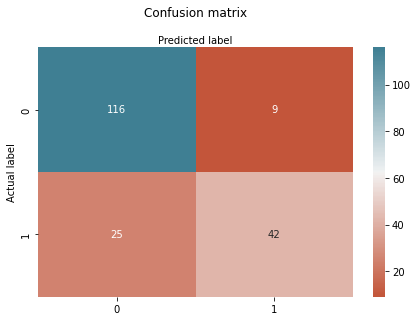

In [12]:
# Visualizing the confusion matrix using matplotlib & seaborn's heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=sns.diverging_palette(20, 220, n=200) ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Model Evaluation**

In [13]:
# Assessing how accurate the model was in predicting whether a patient had diabetes or not

target_names = ['Negative : Without diabetes', 'Positive : With diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                             precision    recall  f1-score   support

Negative : Without diabetes       0.82      0.93      0.87       125
   Positive : With diabetes       0.82      0.63      0.71        67

                   accuracy                           0.82       192
                  macro avg       0.82      0.78      0.79       192
               weighted avg       0.82      0.82      0.82       192



The model was 82% accurate which is a very good score and also means the model is accurate. Presision column is how presice the model accurately predicts if a patient has diabetes or not and Recall column uses the test set (25%) to accurately identify patients that has diabetes or not.

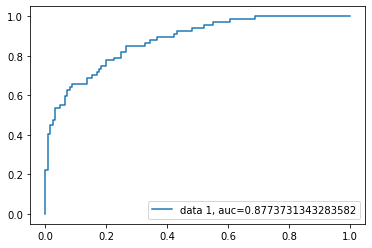

In [14]:
# Using a ROC Curve to check how good the classifier was

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In conclusion, Receiver Operating Characteristic (ROC) curve plots the true positive rate verses the false positive rate. When ROC Curve is used on a classifer, an AUC score between 1 and 0 will be calculated. If the AUC score is closer to 1, it indicates that the classifer was very good, almost perfect and a score closer to 0 means the classifier was not good. 

The AUC score from the plot is 0.87 meaning the classifier was almost perfect.